# Bagging and Boosting 



## Problem Statement

Recipes of various dishes from different asian cuisines are given. The aim is to classify them based on the ingredients.

In [2]:
#Import required libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Dataset

<b>Recipes.csv</b> is the dataset that contains varies ingredients along with cuisines they are from. There are around 383 ingredients(__features__) and respective cuisine(__target__) such as Korea, Japan, China, Thailand and India.

# Data Analysis

<div style="background-color:##EDF9FF">
  <ul><li><h3> Checking Data</h3></li></ul>
</div>

In [3]:
data=pd.read_csv('Recipes.csv')
data.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
data.shape

(2448, 384)

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has 2448 rows and 384 columns </span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Testing For Null Values</h3></li></ul>
</div>

In [5]:
data.isna().sum().sum()

0

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">Dataset has no null values.</span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3> Check Distribution Of Target Variable</h3></li></ul>
</div>

In [6]:
data.cuisine.unique()

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [7]:
target_ratio=pd.DataFrame({'Counts':data.cuisine.value_counts(),'Percentage':data.cuisine.value_counts()/len(data)})
target_ratio

,Counts,Percentage
korean,799,0.326389
indian,598,0.244281
chinese,442,0.180556
japanese,320,0.130719
thai,289,0.118056


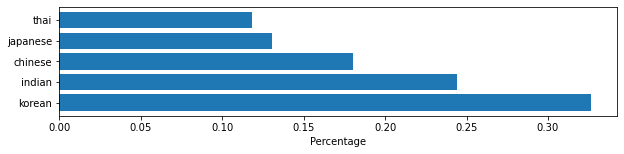

In [8]:
plt.figure(figsize = (10,2))
plt.barh(target_ratio.index, target_ratio.Percentage)
plt.xlabel('Percentage')
plt.show()

<div style="background-color:##EDF9FF">
  <ul><li><h3>Encode Target Vairable</h3></li></ul>
</div>

In [9]:
lb=LabelEncoder()
data.cuisine=lb.fit_transform(data.cuisine)

In [10]:
lb.classes_

array(['chinese', 'indian', 'japanese', 'korean', 'thai'], dtype=object)

<div style="background-color:##EDF9FF">
  <ul><li><h3>Selecting Features</h3></li></ul>
</div>

In [11]:
X=data.drop(['cuisine'],axis=1)
y=data.cuisine

<div style="background-color:##EDF9FF">
  <ul><li><h3>Training And Testing Data</h3></li></ul>
</div>

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=8,test_size=0.3)

## Normal Machine Learning Algorithms

### DecisionTreeClassifier

In [13]:
dt_clf=DecisionTreeClassifier(max_depth=1)
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
acc_dt=round(accuracy_score(y_test,dt_pred),3)
print(acc_dt)

0.473


### Gaussian Naive Bayes

In [14]:
gnb_model=GaussianNB()
gnb_model.fit(X_train,y_train)
gnb_pred=gnb_model.predict(X_test)
acc_gnb=round(accuracy_score(y_test,gnb_pred),3)
print(acc_gnb)

0.565


## Boosting Algorithms 

In [15]:
from sklearn.ensemble import RandomForestClassifier  

classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  

classifier.fit(X_train,y_train)  

y_pred=gnb_model.predict(X_test)

rf_gnb=round(accuracy_score(y_test,y_pred),3)

print(rf_gnb)

0.565


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">The accuracy value of both the models are pretty good but let us try using AdaBoost to improve the accuracy</span>
</div>

---

# B Boosting Algorithms

## 1- AdaBoost

Following parameters should be considered before applying the classifier:
- __base_estimator__: `object` Base model/estimator to be used. By default the base estimator is `DecisionTreeClassifier(max_depth=1)`
- __n_estimators__: `int` By default value is __50__. Used to specify maximum number of estimator to be trained to boost the model. If perfect fit occurs then,  the learning procedure is stopped early.
- __learning_rate__: `float` Shrinks the contribution of each estimator by the value provided.

For more details: <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html'>AdaBoostClassifier</a>


---

In [16]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.6)
ada.fit(X_train,y_train)
ada_pred=ada.predict(X_test)
acc_ada=round(accuracy_score(y_test,ada_pred),3)
print(acc_ada)

0.735


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">AdaBoost uses DecisionTreeClassifier(max_depth=1) by default</span>
</div>

In [17]:
ada_gnb=AdaBoostClassifier(base_estimator=GaussianNB(),n_estimators=70,learning_rate=0.5)
ada_gnb.fit(X_train,y_train)
agnb_pred=ada_gnb.predict(X_test)
acc_agnb=round(accuracy_score(y_test,agnb_pred),3)
print(acc_agnb)

0.667


<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">The accuracy of both the models has increased.</span>
</div>

# Visualization

<BarContainer object of 4 artists>

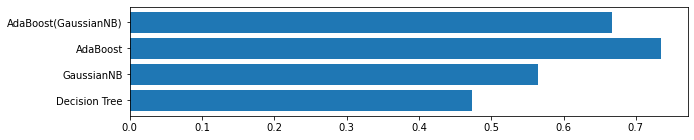

In [18]:
plt.figure(figsize=(10,2))
plt.barh(np.arange(4),[acc_dt,acc_gnb,acc_ada,acc_agnb],\
         tick_label=['Decision Tree','GaussianNB','AdaBoost','AdaBoost(GaussianNB)'])


### 2 GradientBoostingClassifier

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

pred = gbc.predict(X_test)
accuracy_score(y_test,pred)

0.7850340136054422

### 3 XGBClassifier

https://xgboost.readthedocs.io/en/stable/ 

In [21]:
pip install --user xgboost

Could not fetch URL https://pypi.org/simple/xgboost/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/xgboost/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xgboost (from versions: none)
ERROR: No matching distribution found for xgboost


In [22]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb_clf = XGBClassifier(learning_rate=0.25, n_estimators=100)
xgb_clf.fit(X_train,y_train)

y_pred = xgb_clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)